<a href="https://colab.research.google.com/github/Cdivyam/Machine-Learning-Basics/blob/Create-Notebooks-Folder/LinearRegression/Notebooks/Linear_Regression_Math.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [0]:
# define data size
n = 300

In [3]:
np.random.seed(0)           # random seed for constant output
X = np.linspace(0, 1, n)    # have linearly spaced 'n' numbers in X
X = X.reshape(n,1)          # reshape from unranked array to ranked array
X.shape

(300, 1)

In [4]:
Y = 20*X + 7 + np.random.normal(0, 0.8, X.shape)  # have linearly spaced numbers in Y with gausian noise
Y.shape

(300, 1)

In [5]:
Y[:5]

array([[8.41124188],
       [7.3870154 ],
       [7.91676965],
       [8.99338346],
       [8.76160492]])

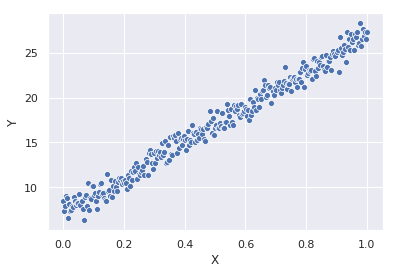

In [6]:
sns.set()
sns.scatterplot(x = X[:, 0], y = Y[:, 0])         #Plot current dataset
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [0]:
# shuffle and split data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 5)

In [8]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(240, 1)
(240, 1)
(60, 1)
(60, 1)


In [0]:
# function to initialize parameters
def initialize_parameters(dim):
  w1 = np.random.rand()
  w0 = np.random.rand()

  return w1, w0 

In [0]:
# function to propagate through the Machine Learning Model
def propagate(w0, w1, X, Y):
  m = Y.shape[0]
  
  y_hat = np.multiply(X, w1) + w0 # hypothesis function
  
  J = 0.5/m*(np.sum(np.power((Y - y_hat), 2))) # cost function
  
  dw1 = 1/m * (np.sum(np.multiply((y_hat - Y), X))) # gradient descent for w1 
  dw0 = 1/m * np.sum(y_hat - Y) # gradient descent for w0
  
  grads = { 'dw1' : dw1,  # keep gradients at one place - dw0, dw1
            'dw0' : dw0}
  
  return grads, J

In [0]:
# function to optimize parameters
def optimize(w0, w1, X, Y, num_iter, learn_rate):
  
  costs = [] # list for all the costs
  for i in range(num_iter):
    grads, cost = propagate(w0, w1, X, Y) # propagate through the linear regression
    
    dw1 = grads['dw1']
    dw0 = grads['dw0']
    
    # optimize the gradients
    w1 = w1 - learn_rate*dw1 
    w0 = w0 - learn_rate*dw0 
    
    if i%1000 == 0:
      print(cost)
      costs.append(cost)
  params = {'w1' : w1, 'w0' : w0}
  
  grads = { 'dw1' : dw1, 'dw0' : dw0}
  
  return params, grads, costs

In [0]:
# predict the test dataset
def predict(X, w1, w0):

  Y = X*w1 + w0

  return Y

In [0]:
def model(X_train, y_train, X_test, y_test, num_iter, learn_rate):
  
  # initialize parameters
  w1, w0 = initialize_parameters(X_train.shape[0])
  
  # propagate and optimize
  params, grads, costs = optimize(w0, w1, X_train, y_train, num_iter, learn_rate)
  
  w1 = params['w1']
  w0 = params['w0']

  # predict test set
  y_preds = predict(X_test, w1, w0)
  
  return w1, w0, costs, y_preds

In [14]:
w1, w0, costs, y_preds = model(X_train, y_train, X_test, y_test, num_iter = 50000, learn_rate = 0.001)

144.41816145569373
17.035770191334393
6.052414981233558
4.619038718128837
4.029516311403414
3.567019301694245
3.166004636934383
2.8148274283893833
2.5070082724453897
2.23717069571208
2.00062628434477
1.7932670987173145
1.6114922067014055
1.4521449779819917
1.3124582531869677
1.1900062893727692
1.082662635464121
0.988563205160586
0.9060739059702937
0.8337622622232886
0.7703725392807828
0.7148039369573918
0.6660914734721783
0.6233892279669077
0.5859556505879622
0.5531406850327615
0.5243744799359707
0.4991574930621516
0.47705181645812356
0.4576735719213411
0.4406862447268961
0.42579483984946187
0.41274075919949016
0.4012973109138163
0.3912657727168211
0.3824719409900873
0.3747631056231135
0.36800539811156363
0.3620814668511681
0.35688843925742497
0.35233613532208813
0.348345501583756
0.34484723831756614
0.3417805961043229
0.33909232088074526
0.3367357291510378
0.3346698973002566
0.33285895093143963
0.33127144188538993
0.32987980212471996


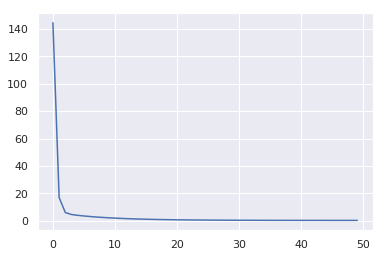

In [15]:
# plot the costs
sns.set(style= 'darkgrid')
sns.lineplot(x = range(len(costs)), y = costs)

In [16]:
# print the weights w0 and w1
print(w1)
print(w0)

19.265877250181877
7.411609426690644


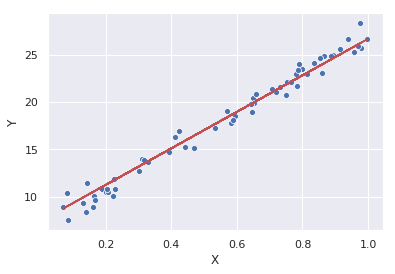

In [17]:
# plot the regression model
sns.set()
sns.scatterplot(x = X_test[:, 0], y = y_test[:, 0])
plt.plot(X_test, y_preds, color = 'r')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [0]:
#Rsquared Error
def r_squared(X, Y):

  n = X.shape[0]
  sX = np.sum(X)
  sY = np.sum(Y)
  sXY = np.sum(np.multiply(X, Y))
  sX2 = np.sum(np.square(X))
  sY2 = np.sum(np.square(Y))
  numerator = n*sXY - sX*sY

  den = (n*sX2-sX**2)*(n*sY2-sY**2)
  denominator = np.sqrt(den)

  rsqr = numerator/denominator

  return rsqr

In [19]:
train_score = r_squared(X_train, y_train)
print(train_score)

0.9901767730853066


In [0]:
# 98 % of outputs(Y_train) can be explained by our inputs(X_train)
# similarly you can find test_score as well